In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import time
import os
import json
from keras import regularizers
from keras import backend as K
import numpy as np
K.tensorflow_backend._get_available_gpus()
# import theano
# theano.config.device = 'gpu'
# theano.config.floatX = 'float32'

Using TensorFlow backend.


[]

In [2]:
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

print(tf.__version__)

train_data_path ="./../Data/train/train.csv"
test_data_path = "./../Data/test/test.csv"

dataset = pd.read_csv(train_data_path,skipinitialspace=True)
test_data = pd.read_csv(test_data_path,skipinitialspace=True)


train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
        
dataset

1.13.1


,ID,Score,col1,col2,col3,col4,col5,col6,col7,col8,...,col3796,col3797,col3798,col3799,col3800,col3801,col3802,col3803,col3804,col3805
0,5,3.475628,0,4.058,0.824,0,10.267,0.728,4.403,0.050,...,1.067,0,0.0,0.115,30.395,24.541,0,0.415,0.997,0
1,8,3.601332,0,4.111,0.929,0,8.352,0.907,4.216,0.034,...,0.934,0,0.0,0.227,38.508,35.038,0,3.979,0.997,3
2,9,1.935003,0,4.139,0.833,66,9.494,0.733,4.069,0.267,...,1.722,0,0.0,0.148,27.932,19.518,0,0.849,0.999,0
3,12,3.283663,0,4.016,0.880,0,8.237,0.836,3.956,0.129,...,0.993,0,0.0,0.124,18.993,25.403,0,0.988,0.998,0
4,14,3.409121,0,4.657,0.522,0,35.882,0.383,4.234,-0.089,...,2.095,0,0.0,0.088,44.225,15.741,0,1.595,0.997,0
5,15,2.523486,0,4.623,0.711,66,35.891,0.581,4.154,0.327,...,3.785,0,0.0,0.078,157.893,20.733,0,3.691,0.997,0
6,18,0.919078,0,4.345,0.668,0,20.449,0.542,4.773,-0.013,...,1.604,1,0.0,0.107,5.552,14.887,0,4.480,0.996,4
7,19,2.769820,0,4.380,0.722,0,16.474,0.531,3.890,-0.056,...,1.292,0,0.0,0.090,36.866,18.200,0,3.190,0.998,0
8,20,2.681964,0,4.235,0.923,16,15.185,0.902,4.606,0.097,...,1.056,1,0.0,0.110,38.458,36.047,0,4.016,0.998,2
9,25,2.465977,0,4.214,0.522,66,3.885,0.426,4.156,0.346,...,1.726,1,0.0,0.109,0.000,9.349,0,0.411,0.999,0


In [4]:
print(dataset.columns)

Index(['ID', 'Score', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7',
       'col8',
       ...
       'col3796', 'col3797', 'col3798', 'col3799', 'col3800', 'col3801',
       'col3802', 'col3803', 'col3804', 'col3805'],
      dtype='object', length=3807)


In [5]:
# describe for Normalization
label = "Score"
train_stats = train_dataset.describe()
train_stats.pop(label)
train_stats = train_stats.transpose()

test_stats = test_dataset.describe()
test_stats.pop(label)
test_stats = test_stats.transpose()

test_data_stats = test_data.describe()
test_data_stats = test_data_stats.transpose()

# pop label
# test_goto.pop("keiyaku_pr")
train_labels = train_dataset.pop(label)
test_labels = test_dataset.pop(label)

# dataset.isnull().any()

In [6]:
# Normalization
def norm(train_dataset,train_stats):
    return (train_dataset - train_stats["mean"]) / train_stats["std"]

normed_train_data = norm(train_dataset,train_stats)
normed_test_data = norm(test_dataset,test_stats)
# normed_train_data = normed_train_data.dropna(axis=1)
# normed_test_data = normed_test_data.dropna(axis=1)

normed_train_data.fillna(0, inplace=True)
normed_test_data.fillna(0, inplace=True)
normed_test_data = norm(test_data,test_data_stats)
normed_test_data.fillna(0, inplace=True)


normed_test_data.shape

(13732, 3806)

In [21]:
# model
layer_numbers = 128

# mean_squared_logarithmic_error, mean_absolute_percentage_error, mean_absolute_error
loss = 'mean_squared_error'
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def build_model(dataset):
    model = keras.Sequential([
    layers.Dense(layer_numbers,input_shape= [len(train_dataset.keys())],
                 activation = tf.nn.relu,
                kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(layer_numbers, activation=tf.nn.relu,
                kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dense(layer_numbers, activation=tf.nn.relu,
#         kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dense(layer_numbers, activation=tf.nn.relu,
#                 kernel_regularizer=regularizers.l2(0.01)),
#     layers.Dense(layer_numbers, activation=tf.nn.relu,
#                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)
  ])
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer='adam'
    model.compile(
        loss="mean_squared_error",
        optimizer=optimizer,
        metrics=[soft_acc,"mean_squared_error"],
    )
    return model

def build_model_dropout(dataset):
    model = keras.Sequential([
    # 入力層 から 隠れ層
    layers.Dense(layer_numbers,input_shape= [len(train_dataset.keys())],
                 activation = tf.nn.relu),
    layers.Dropout(rate=0.3),
    layers.Dense(layer_numbers, activation=tf.nn.relu),
    layers.Dropout(rate=0.2),
    layers.Dense(layer_numbers, activation=tf.nn.relu),
    layers.Dropout(rate=0.3),
    layers.Dense(layer_numbers, activation=tf.nn.relu),
    layers.Dropout(rate=0.2),
    # 隠れ層 から 出力層　
    layers.Dense(1)
  ])
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer='adam'
    model.compile(
        loss="mean_squared_error",
        optimizer=optimizer,
        metrics=[soft_acc,"mean_squared_error"],
    )
    return model


In [22]:


def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.plot(hist["epoch"], hist["loss"], label="Train")
    plt.plot(hist["epoch"], hist["val_loss"], label="Val")
    plt.legend()
#     plt.ylim([0, 5])


    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("acc")
    plt.plot(hist["epoch"], hist["soft_acc"], label="Train")
    plt.plot(hist["epoch"], hist["val_soft_acc"], label="Val")
    plt.legend()
#     plt.ylim([0, 20])



In [23]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("100")
        print(".", end="")

In [24]:
# build model
# model = build_model_dropout(normed_train_data)

model = build_model(normed_train_data)

# if os.path.isfile("param_goto.hdf5"):
#     model.load_weights('param_goto.hdf5')
    
model.summary()

# example trainning
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               487296    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 503,937
Trainable params: 503,937
Non-trainable params: 0
_________________________________________________________________


array([[0.74993914],
       [1.175977  ],
       [0.49693352],
       [1.2706431 ],
       [0.88770705],
       [0.11365783],
       [1.019623  ],
       [1.2954646 ],
       [0.9164804 ],
       [0.629891  ]], dtype=float32)

In [29]:
# callback when NG
EPOCHS = 400

start_time = time.time()
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, shuffle = True,
                    validation_split = 0.2, verbose=2, callbacks=[
#                         early_stop,
                        PrintDot()])

end_time = time.time()
excute_time = end_time-start_time
print("excute time: {}".format(excute_time))
plot_history(history)


Train on 7689 samples, validate on 1923 samples
Epoch 1/400
100
. - 8s - loss: 0.9436 - soft_acc: 0.5197 - mean_squared_error: 0.4562 - val_loss: 1.0148 - val_soft_acc: 0.4930 - val_mean_squared_error: 0.5506
Epoch 2/400
. - 7s - loss: 0.8933 - soft_acc: 0.5162 - mean_squared_error: 0.4573 - val_loss: 0.9819 - val_soft_acc: 0.5031 - val_mean_squared_error: 0.5705
Epoch 3/400
. - 8s - loss: 0.8561 - soft_acc: 0.5083 - mean_squared_error: 0.4663 - val_loss: 1.2119 - val_soft_acc: 0.4259 - val_mean_squared_error: 0.8344
Epoch 4/400
. - 7s - loss: 0.8253 - soft_acc: 0.5140 - mean_squared_error: 0.4664 - val_loss: 1.0513 - val_soft_acc: 0.4594 - val_mean_squared_error: 0.7089
Epoch 5/400
. - 7s - loss: 0.7700 - soft_acc: 0.5201 - mean_squared_error: 0.4495 - val_loss: 0.8726 - val_soft_acc: 0.4848 - val_mean_squared_error: 0.5778
Epoch 6/400
. - 7s - loss: 0.7409 - soft_acc: 0.5238 - mean_squared_error: 0.4572 - val_loss: 0.8211 - val_soft_acc: 0.4921 - val_mean_squared_error: 0.5476
Epoch 

KeyboardInterrupt: 

In [ ]:
json_string = model.to_json()
with open('mode.json', 'w') as outfile:
    json.dump(json_string, outfile)

#save weight
model.save_weights('param.hdf5')

In [27]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()
hist

,loss,soft_acc,mean_squared_error,val_loss,val_soft_acc,val_mean_squared_error,epoch
0,4.546123,0.362365,1.391371,4.735461,0.341530,2.026575,0
1,3.269883,0.419202,0.911121,2.776093,0.470458,0.755673,1
2,2.492174,0.454386,0.744940,2.172369,0.435963,0.658106,2
3,2.055438,0.465090,0.696978,2.123741,0.396858,0.908015,3
4,1.789891,0.472352,0.669119,1.591225,0.496243,0.570705,4
5,1.580148,0.483359,0.634977,1.516084,0.451332,0.646240,5
6,1.296056,0.505936,0.499784,1.279330,0.492486,0.546750,6
7,1.160264,0.509754,0.473843,1.205607,0.495048,0.566285,7
8,1.091808,0.510345,0.484779,1.125905,0.502391,0.548772,8
9,1.016843,0.508789,0.470480,1.106244,0.471141,0.593350,9


ValueError: x and y must be the same size

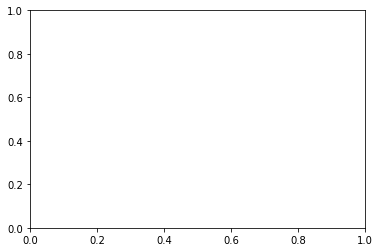

In [28]:
# prediction
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
test_data_predictions = model.predict(normed_test_data)
test_data_predictions.shape

In [51]:
import datetime
submit = pd.read_csv("./Data/sample_submit.csv",header=None)
submit[1] = test_data_predictions
now = datetime.datetime.now()
now_str = '{}_{}_{}_{}_{}'.format(now.year, now.month, now.day, now.hour, now.minute)
submit_file = './Data/submit/submit_{}.csv'.format(now_str)
submit.to_csv(submit_file,header=None,index=None)

In [ ]:
weights, biases = model.layers[0].get_weights()
weights

In [ ]:
w1,b1 = model.layers[0].get_weights()

In [ ]:
w2,b2 = model.layers[1].get_weights()
w2.shape

In [ ]:
w3,b3 = model.layers[2].get_weights()
w3.shape

In [ ]:
weights = []
biases = []
feature_number = 8
layer_number = 64
weight= np.eye(feature_number,feature_number)
bias = np.eye(layer_number)
for i in range(3):
    w,b = model.layers[i].get_weights()
    weights.append(w)
    biases.append(b)
# for item in weights:
    weight = np.dot(weight,item)
for item in biases:
    bias = np.dot(bias,item)
np.save('weight_{}feature'.format(feature_number),weight)
np.save('bias_{}feature'.format(feature_number),weight)
weight